# Procesos Gaussianos y TensorFlow



## Gaussian Process Regressor (GPR)

Un Gaussian Process Regressor (GPR), o regresor basado en procesos Gaussianos, es un método de aprendizaje no paramétrico utilizado para problemas de regresión. A continuación, se presentan los conceptos principales y la matemática fundamental de un GPR:

### Proceso Gaussiano (GP)

- Un Proceso Gaussiano es una generalización de la distribución normal multivariada a dimensiones infinitas.
- En el contexto de la regresión, un GP es un conjunto de variables aleatorias, cualquier subconjunto de las cuales tiene una distribución normal multivariada.
- Un proceso Gaussiano está completamente definido por su función de media $ m(\mathbf{x})$ y su función de covarianza o kernel $k(\mathbf{x}, \mathbf{x}')$:

$
f(\mathbf{x}) \sim \mathscr{GP}(m(\mathbf{x}), k(\mathbf{x}, \mathbf{x}'))
$

donde:

- $m(\mathbf{x}) = \mathbb{E}[f(\mathbf{x})]$ es la media.
- $k(\mathbf{x}, \mathbf{x}') = \mathbb{E}[(f(\mathbf{x}) - m(\mathbf{x}))(f(\mathbf{x}') - m(\mathbf{x}'))]$ es la covarianza o kernel.


### Función de Media y Función de Covarianza

- Función de Media  $m(\mathbf{x})$: Para simplificar, generalmente se asume que la función de media es cero, $ m(\mathbf{x}) = 0 $, aunque se pueden incorporar términos más complejos.

- Función de Covarianza $k(\mathbf{x}, \mathbf{x}')$: Define la similitud entre diferentes puntos de datos. Un kernel comúnmente usado es el kernel RBF (Radial Basis Function) o kernel Gaussiano, definido como:

$k(\mathbf{x}, \mathbf{x}') = \sigma_f^2 \exp\left(-\frac{||\mathbf{x} - \mathbf{x}'||^2}{2l^2}\right)$

donde $\sigma_f^2$ es la varianza y $ l $ es el parámetro de longitud que controla la suavidad de las funciones generadas por el GP.

### Inferencia y Predicción

Dado un conjunto de datos de entrenamiento $ \mathbf{X} = \{\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n\} $ y sus correspondientes observaciones $ \mathbf{y} = \{y_1, y_2, \ldots, y_n\} $, queremos predecir la salida $ y_* $ para un nuevo punto de entrada $\mathbf{x}_* $.

### Distribución Conjunta

Se asume que los valores de las observaciones $\mathbf{y}$ y el valor predicho $y_*$ siguen una distribución normal conjunta:

\begin{equation}
\begin{bmatrix}
\mathbf{y} \\
y_*
\end{bmatrix}
\sim \mathscr{N}\left(
\begin{bmatrix}
\mathbf{0} \\
0
\end{bmatrix},
\begin{bmatrix}
K(\mathbf{X}, \mathbf{X}) + \sigma_n^2 I & K(\mathbf{X}, \mathbf{x}_*) \\
K(\mathbf{x}_*, \mathbf{X}) & K(\mathbf{x}_*, \mathbf{x}_*)
\end{bmatrix}
\right)
\end{equation}

donde:


- $ K(\mathbf{X}, \mathbf{X})$ es la matriz de covarianza entre los puntos de entrenamiento.
- $ K(\mathbf{X}, \mathbf{x}_*) $ es el vector de covarianza entre los puntos de entrenamiento y el nuevo punto.
- $\sigma_n^2$ es la varianza del ruido.


### Predicción de la Media y la Varianza

Condicionando en los datos observados, la distribución predictiva para $y_*$ es:


$y_* | \mathbf{X}, \mathbf{y}, \mathbf{x}_* \sim \mathscr{N}(\mu_*, \sigma_*^2)$

donde:

### Media Predictiva

$\mu_* = K(\mathbf{x}_*, \mathbf{X}) [K(\mathbf{X}, \mathbf{X}) + \sigma_n^2 I]^{-1} \mathbf{y}$
    
    
### Varianza Predictiva
  
  $\sigma_*^2 = K(\mathbf{x}_*, \mathbf{x}_*) - K(\mathbf{x}_*, \mathbf{X}) [K(\mathbf{X}, \mathbf{X}) + \sigma_n^2 I]^{-1} K(\mathbf{X}, \mathbf{x}_*)$

### Ventajas y Desventajas de GPR

Ventajas:

- Ofrece predicciones probabilísticas (incertidumbre en las predicciones).
- Es flexible y puede modelar funciones complejas.
- No requiere suposiciones específicas sobre la forma de la función de mapeo entre entradas y salidas.


Desventajas:

- Escalabilidad limitada a conjuntos de datos grandes debido a la inversión de matrices ($O(n^3)$ para $n$ puntos de datos).
- La elección del kernel y sus hiperparámetros puede ser crucial para un buen rendimiento.





## Gaussian Process Regressor (GPR)

Un Gaussian Process Regressor (GPR), o regresor basado en procesos Gaussianos, es un método de aprendizaje no paramétrico utilizado para problemas de regresión. A continuación, se presentan los conceptos principales y la matemática fundamental de un GPR:

### Proceso Gaussiano (GP)

- Un Proceso Gaussiano es una generalización de la distribución normal multivariada a dimensiones infinitas.
- En el contexto de la regresión, un GP es un conjunto de variables aleatorias, cualquier subconjunto de las cuales tiene una distribución normal multivariada.
- Un proceso Gaussiano está completamente definido por su función de media $ m(\mathbf{x})$ y su función de covarianza o kernel $k(\mathbf{x}, \mathbf{x}')$:

$
f(\mathbf{x}) \sim \mathscr{GP}(m(\mathbf{x}), k(\mathbf{x}, \mathbf{x}'))
$

donde:

- $m(\mathbf{x}) = \mathbb{E}[f(\mathbf{x})]$ es la media.
- $k(\mathbf{x}, \mathbf{x}') = \mathbb{E}[(f(\mathbf{x}) - m(\mathbf{x}))(f(\mathbf{x}') - m(\mathbf{x}'))]$ es la covarianza o kernel.


### Función de Media y Función de Covarianza

- Función de Media  $m(\mathbf{x})$: Para simplificar, generalmente se asume que la función de media es cero, $ m(\mathbf{x}) = 0 $, aunque se pueden incorporar términos más complejos.

- Función de Covarianza $k(\mathbf{x}, \mathbf{x}')$: Define la similitud entre diferentes puntos de datos. Un kernel comúnmente usado es el kernel RBF (Radial Basis Function) o kernel Gaussiano, definido como:

$k(\mathbf{x}, \mathbf{x}') = \sigma_f^2 \exp\left(-\frac{||\mathbf{x} - \mathbf{x}'||^2}{2l^2}\right)$

donde $\sigma_f^2$ es la varianza y $ l $ es el parámetro de longitud que controla la suavidad de las funciones generadas por el GP.

### Inferencia y Predicción

Dado un conjunto de datos de entrenamiento $ \mathbf{X} = \{\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n\} $ y sus correspondientes observaciones $ \mathbf{y} = \{y_1, y_2, \ldots, y_n\} $, queremos predecir la salida $ y_* $ para un nuevo punto de entrada $\mathbf{x}_* $.

### Distribución Conjunta

Se asume que los valores de las observaciones $\mathbf{y}$ y el valor predicho $y_*$ siguen una distribución normal conjunta:

\begin{equation}
\begin{bmatrix}
\mathbf{y} \\
y_*
\end{bmatrix}
\sim \mathscr{N}\left(
\begin{bmatrix}
\mathbf{0} \\
0
\end{bmatrix},
\begin{bmatrix}
K(\mathbf{X}, \mathbf{X}) + \sigma_n^2 I & K(\mathbf{X}, \mathbf{x}_*) \\
K(\mathbf{x}_*, \mathbf{X}) & K(\mathbf{x}_*, \mathbf{x}_*)
\end{bmatrix}
\right)
\end{equation}

donde:


- $ K(\mathbf{X}, \mathbf{X})$ es la matriz de covarianza entre los puntos de entrenamiento.
- $ K(\mathbf{X}, \mathbf{x}_*) $ es el vector de covarianza entre los puntos de entrenamiento y el nuevo punto.
- $\sigma_n^2$ es la varianza del ruido.


### Predicción de la Media y la Varianza

Condicionando en los datos observados, la distribución predictiva para $y_*$ es:


$y_* | \mathbf{X}, \mathbf{y}, \mathbf{x}_* \sim \mathscr{N}(\mu_*, \sigma_*^2)$

donde:

### Media Predictiva

$\mu_* = K(\mathbf{x}_*, \mathbf{X}) [K(\mathbf{X}, \mathbf{X}) + \sigma_n^2 I]^{-1} \mathbf{y}$
    
    
### Varianza Predictiva
  
  $\sigma_*^2 = K(\mathbf{x}_*, \mathbf{x}_*) - K(\mathbf{x}_*, \mathbf{X}) [K(\mathbf{X}, \mathbf{X}) + \sigma_n^2 I]^{-1} K(\mathbf{X}, \mathbf{x}_*)$

### Ventajas y Desventajas de GPR

Ventajas:

- Ofrece predicciones probabilísticas (incertidumbre en las predicciones).
- Es flexible y puede modelar funciones complejas.
- No requiere suposiciones específicas sobre la forma de la función de mapeo entre entradas y salidas.


Desventajas:

- Escalabilidad limitada a conjuntos de datos grandes debido a la inversión de matrices ($O(n^3)$ para $n$ puntos de datos).
- La elección del kernel y sus hiperparámetros puede ser crucial para un buen rendimiento.





# Gaussian Process Classification (GPC)

- Para extender el Gaussian Process Regressor (GPR) a un problema de clasificación, utilizamos un enfoque conocido como Gaussian Process Classification (GPC).

- A diferencia de la regresión, donde el objetivo es predecir un valor continuo, en la clasificación se busca predecir una etiqueta discreta (por ejemplo, clases 0 y 1).

### Modelo Latente

- En el GPC, en lugar de modelar la salida  $y$ directamente, modelamos una función latente  $f(\mathbf{x})$ con un proceso Gaussiano y luego pasamos esta función a través de una función sigmoide para obtener probabilidades de clase.

- Para un problema de clasificación binaria:


$f(\mathbf{x}) \sim \mathscr{GP}(m(\mathbf{x}), k(\mathbf{x}, \mathbf{x}')),$

donde, como en el caso de la regresión, $m(\mathbf{x})$ es la función de media (generalmente asumida como cero) y $k(\mathbf{x}, \mathbf{x}')$ es la función de covarianza o kernel.

### Función de Enlace Sigmoide

- Para convertir la función latente $f(\mathbf{x})$ en probabilidades, se utiliza una función de enlace sigmoide, como la función logística:


$\sigma(f) = \frac{1}{1 + e^{-f}}$.

- La probabilidad de pertenecer a la clase 1 dada la función latente $f(\mathbf{x})$ es:


$p(y = 1 \mid f(\mathbf{x})) = \sigma(f(\mathbf{x}))$.

### Inferencia y Predicción

Dado un conjunto de datos de entrenamiento $ \mathbf{X} = \{\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n\}$ y sus correspondientes etiquetas $\mathbf{y} = \{y_1, y_2, \ldots, y_n\} $, queremos predecir la probabilidad de que una nueva entrada $\mathbf{x}_*$ pertenezca a la clase 1.

### Distribución Conjunta

- La inferencia en GPC es más compleja que en el caso de regresión debido a la naturaleza no lineal de la función de enlace sigmoide. La distribución conjunta de $ \mathbf{f} = \{f(\mathbf{x}_1), \ldots, f(\mathbf{x}_n)\} $ es Gaussiana:

$
\mathbf{f} \sim \mathscr{N}(\mathbf{0}, K(\mathbf{X}, \mathbf{X})),
$

donde $ K(\mathbf{X}, \mathbf{X}) $ es la matriz de covarianza calculada usando el kernel.

### Distribución Posterior

- La distribución posterior de $\mathbf{f} $ dada las observaciones $ \mathbf{y}$ se define como:

$
p(\mathbf{f} \mid \mathbf{X}, \mathbf{y}) = \frac{p(\mathbf{y} \mid \mathbf{f}) p(\mathbf{f} \mid \mathbf{X})}{p(\mathbf{y} \mid \mathbf{X})}.
$

- Dado que la función de enlace sigmoide introduce una no linealidad, $ p(\mathbf{y} \mid \mathbf{f}) $ no es una Gaussiana, lo que hace que la posterior no sea analíticamente tractable.

### Métodos de Aproximación

Para realizar la inferencia, se utilizan métodos de aproximación como:


- Laplace Approximation: Aproxima el posterior como una Gaussiana centrada en el modo de la distribución posterior.
- Expectation Propagation (EP): Una aproximación iterativa que busca minimizar la divergencia de Kullback-Leibler entre la distribución aproximada y la verdadera posterior.
- Variational Inference: Maximiza una cota inferior de la evidencia del modelo para obtener una aproximación Gaussiana de la posterior.


### Ejercicio

Mediante un ejemplo ilustrativo, describa las diferencias conceptuales y matemáticas de los tres métodos de aproximación descritos anteriormente.

### Predicción

- Para una nueva entrada $\mathbf{x}_* $, la predicción se basa en la probabilidad posterior:


$p(y_* = 1 \mid \mathbf{x}_*, \mathbf{X}, \mathbf{y}) = \int \sigma(f_*) p(f_* \mid \mathbf{x}_*, \mathbf{X}, \mathbf{y}) df_*$.

- Este integral se puede resolver analíticamente para algunas aproximaciones, pero generalmente requiere métodos numéricos.

### Ventajas y Desventajas del GPC

Ventajas:

- Proporciona predicciones probabilísticas con estimaciones de incertidumbre.
- Flexible para modelar funciones complejas y no lineales.
- No requiere suposiciones específicas sobre la forma de la función de mapeo.


Desventajas:

- La inferencia es más compleja y computacionalmente costosa que en la regresión.
- Escalabilidad limitada a conjuntos de datos grandes debido a la inversión de matrices ($O(n^3)$ para $n$ puntos de datos).
- La elección del kernel y sus hiperparámetros es crucial para un buen rendimiento.


# GP con tensores : [GPFlow](https://gpflow.github.io/GPflow/2.9.1/index.html)


### Gaussian Process Regression (GPR) con GPflow

En la GPR, modelamos la función subyacente $f(\mathbf{x})$ que genera los datos observados como un proceso Gaussiano. Esto significa que cualquier conjunto finito de puntos de la función tiene una distribución conjunta Gaussiana.

### Implementación de GPR con GPflow

GPflow es una biblioteca basada en TensorFlow diseñada para construir y entrenar modelos de procesos Gaussianos. Permite implementar de manera eficiente modelos de GPR utilizando optimización de máxima verosimilitud marginal (MLE) u otros métodos de optimización.

### Creación del Modelo en GPflow

En GPflow, un modelo GPR se construye especificando un kernel y los datos de entrenamiento. A continuación, se presenta un ejemplo básico de cómo crear un modelo GPR en GPflow:




#Ejercicio

1. Describa el modelo y la optimización de los GPR, GPC, VGP, SGPR, y SVGP.

2. Discuta los métodos de optimización que utiliza GPFlow con scipy y TensorFlow.

3. Implemente un clasificador multiclase, para la base de datos fashionMnist, utilizando un Sparse GP implementado con GPflow y optimizador de TensorFlow. (ver https://gpflow.github.io/GPflow/develop/getting_started.html)

4. Discuta las ventajas y desventajas de un clasificador tipo autoencoder variacional vs un modelo basado en GP y GPflow.



#Solución preguntas conceptuales:

### Discusión sobre los Métodos de Optimización en GPflow y Scipy/TensorFlow

GPflow es una biblioteca open-source diseñada para trabajar con modelos de Procesos Gaussianos (GP) usando TensorFlow. Estos modelos son altamente flexibles y generan estimaciones de incertidumbre, pero requieren optimización de hiperparámetros para ajustarse adecuadamente a los datos.

La optimización en GPflow implica ajustar los parámetros del modelo (como los del kernel o los puntos de inducción en modelos sparse) para maximizar una función objetivo, como la Evidencia Inferior del Logaritmo Marginal (ELBO) en modelos variacionales.

**Optimización con scipy en GPflow:**

- GPflow puede aprovechar los optimizadores de scipy, que son métodos clásicos de optimización numérica basados en gradientes. Los más comunes incluyen:
  - **L-BFGS-B**: Método cuasi-Newton limitado que utiliza aproximaciones de la matriz Hessiana y soporta límites en los parámetros.
  - **CG (Conjugate Gradient)**: Método de gradiente conjugado eficiente para problemas de gran escala.
  - **BFGS**: Otro método cuasi-Newton, aunque sin soporte para parámetros limitados.

**Ventajas de los optimizadores de scipy:**

- Convergencia rápida debido a su naturaleza determinista y uso de información de segundo orden.
- Adecuados para conjuntos de datos pequeños donde es posible calcular gradientes completos.

**Limitaciones:**

- No son escalables para grandes conjuntos de datos.
- No soportan minibatching, lo que limita su uso en escenarios de datos masivos.

### Comparación entre Clasificadores: VAE vs Modelos Basados en GP y GPflow

Un **Autoencoder Variacional (VAE)** es un modelo generativo que aprende una representación latente de los datos. Se compone de un encoder, que mapea los datos a una distribución latente, y un decoder, que reconstruye los datos. En tareas de clasificación, los VAEs pueden incorporar variables latentes para capturar información relevante sobre las clases.

Los **Procesos Gaussianos (GP)**, implementados con GPflow, son modelos probabilísticos no paramétricos que proporcionan distribuciones sobre funciones, ofreciendo estimaciones de incertidumbre valiosas para tareas de clasificación.

**Ventajas del VAE:**
- Captura de estructuras complejas y reducción de dimensionalidad.
- Capacidad generativa para producir nuevos datos similares a los de entrenamiento.
- Escalabilidad a datos de alta dimensionalidad como imágenes y texto.

**Desventajas del VAE:**
- Entrenamiento complejo y sensible a la configuración.
- Las representaciones latentes pueden no separar claramente las clases sin ajustes adicionales.
- No ofrece estimaciones de incertidumbre de manera directa.

**Ventajas del GP con GPflow:**
- Proporciona predicciones probabilísticas con estimaciones de incertidumbre.
- No requiere especificar una estructura fija, lo que ofrece flexibilidad en la modelación.
- Alta interpretabilidad en las predicciones.

**Desventajas del GP con GPflow:**
- Escalabilidad limitada debido a su alta complejidad computacional en grandes conjuntos de datos.
- Menos eficiente en datos de alta dimensionalidad.
  
### Conclusión

La elección entre un VAE y un modelo basado en GP depende de factores como el tamaño de los datos, la dimensionalidad, la necesidad de incertidumbre y la capacidad generativa. Un VAE es ideal para datos complejos y de alta dimensionalidad, mientras que un GP es preferible cuando se requiere interpretabilidad y estimaciones de incertidumbre en conjuntos de datos más pequeños.


# Solución en código

In [ ]:
!pip install gpflow tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.9/392.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 7.0 MB/s eta 0:00:00


#Datos

In [ ]:
import numpy as np
import tensorflow as tf
import gpflow
import matplotlib.pyplot as plt
from gpflow.utilities import print_summary
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report

# Cargar y preprocesar los datos FashionMNIST
def load_fashion_mnist_data():
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

    # Normalizar los datos
    X_train = X_train.astype(np.float64) / 255.0
    X_test = X_test.astype(np.float64) / 255.0

    # Aplanar las imágenes (cada imagen 28x28 se convierte en un vector de longitud 784)
    X_train = X_train.reshape(-1, 28*28)
    X_test = X_test.reshape(-1, 28*28)

    return (X_train, y_train), (X_test, y_test)

# Cargar los datos
(X_train, y_train), (X_test, y_test) = load_fashion_mnist_data()

# Tomar una parte de los datos para hacer la implementación rápida (debido a la complejidad de GPflow en datasets grandes)
n_samples = 3000
X_train_small = X_train[:n_samples]
y_train_small = y_train[:n_samples]

# Asegurarse de que las etiquetas sean del tipo int64 y en el formato correcto (n_samples, 1)
y_train_small = y_train_small[:, None].astype(np.int64)
y_test = y_test[:, None].astype(np.int64)

# Verificar las formas
print(f"Shape de X_train_small: {X_train_small.shape}")
print(f"Shape de y_train_small: {y_train_small.shape}")  # Esto debería ser (n_samples, 1)



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Shape de X_train_small: (3000, 784)
Shape de y_train_small: (3000, 1)


#Modelo

In [ ]:
# Definir el kernel y el modelo SVGP
kernel = gpflow.kernels.Matern12()
inducing_variable = X_train_small[:500]  # Usamos 50 puntos de inducción

# Definir la likelihood Softmax para clasificación multiclase
likelihood = gpflow.likelihoods.Softmax(num_classes=10)

# Definir el modelo SVGP
model = gpflow.models.SVGP(
    kernel=kernel,
    likelihood=likelihood,
    inducing_variable=inducing_variable,
    num_latent_gps=100  # Una función latente por clase
)



In [ ]:
# Mostrar un resumen del modelo entrenado
gpflow.utilities.print_summary(model)

╒══════════════════════════╤═══════════╤════════════════╤═════════╤═════════════╤═════════════════╤═════════╤══════════════════╕
│ name                     │ class     │ transform      │ prior   │ trainable   │ shape           │ dtype   │ value            │
╞══════════════════════════╪═══════════╪════════════════╪═════════╪═════════════╪═════════════════╪═════════╪══════════════════╡
│ SVGP.kernel.variance     │ Parameter │ Softplus       │         │ True        │ ()              │ float64 │ 1.0              │
├──────────────────────────┼───────────┼────────────────┼─────────┼─────────────┼─────────────────┼─────────┼──────────────────┤
│ SVGP.kernel.lengthscales │ Parameter │ Softplus       │         │ True        │ ()              │ float64 │ 1.0              │
├──────────────────────────┼───────────┼────────────────┼─────────┼─────────────┼─────────────────┼─────────┼──────────────────┤
│ SVGP.inducing_variable.Z │ Parameter │ Identity       │         │ True        │ (500, 784)     

# Entrenamiento

In [ ]:
# Definir el número de épocas y el optimizador
num_epochs = 200
optimizer = tf.optimizers.Adam(learning_rate=0.1)

# Inicializar una lista para almacenar las pérdidas
loss_history = []

# Función de optimización
@tf.function
def optimization_step(model, X_batch, Y_batch):
    with tf.GradientTape() as tape:
        # Calcular la Evidencia Inferior del Logaritmo Marginal (ELBO)
        elbo = model.elbo((X_batch, Y_batch))
        loss = -elbo  # El objetivo es maximizar el ELBO, por lo que minimizamos su negativo
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss



In [ ]:
# Ciclo de entrenamiento
for epoch in range(num_epochs):
    loss = optimization_step(model, X_train_small, y_train_small)
    loss_history.append(loss.numpy())  # Guardar la pérdida actual
    if epoch % 10 == 0:  # Imprimir la pérdida cada 10 épocas
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}")

Epoch 0, Loss: 15291.3337
Epoch 10, Loss: 20226.6294
Epoch 20, Loss: 11667.9596
Epoch 30, Loss: 6529.2104
Epoch 40, Loss: 4654.7497
Epoch 50, Loss: 3955.5999
Epoch 60, Loss: 3671.4213
Epoch 70, Loss: 3511.2439
Epoch 80, Loss: 3412.3414
Epoch 90, Loss: 3339.6809
Epoch 100, Loss: 3281.9734
Epoch 110, Loss: 3230.1100
Epoch 120, Loss: 3187.8779
Epoch 130, Loss: 3186.0115
Epoch 140, Loss: 3130.4070
Epoch 150, Loss: 3113.3957
Epoch 160, Loss: 3078.6823
Epoch 170, Loss: 3054.1064
Epoch 180, Loss: 3036.8339
Epoch 190, Loss: 3022.4056


#Curva de rendimiento

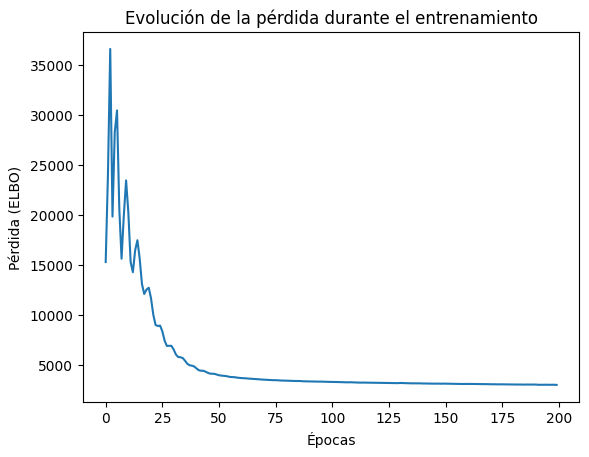

In [ ]:
import numpy as np
import tensorflow as tf
import gpflow
import matplotlib.pyplot as plt
from gpflow.utilities import print_summary
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Visualizar la historia de la pérdida
plt.plot(loss_history)
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (ELBO)')
plt.show()



#Matriz de confusión

Test set accuracy: 81.31%


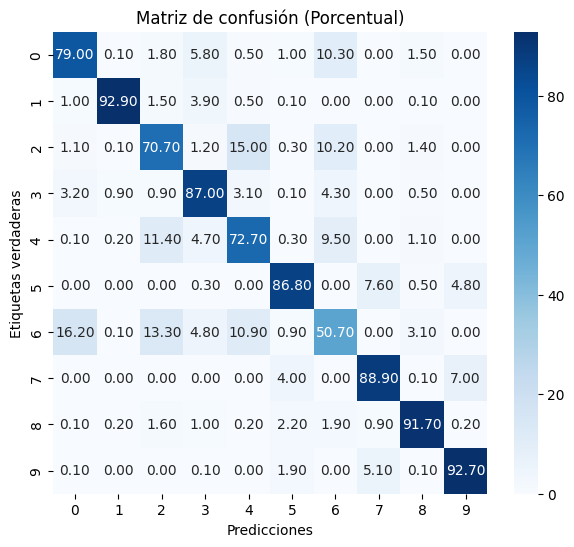


Classification Report:

              precision    recall  f1-score   support

           0     0.7837    0.7900    0.7869      1000
           1     0.9831    0.9290    0.9553      1000
           2     0.6986    0.7070    0.7028      1000
           3     0.7996    0.8700    0.8333      1000
           4     0.7065    0.7270    0.7166      1000
           5     0.8893    0.8680    0.8785      1000
           6     0.5834    0.5070    0.5425      1000
           7     0.8673    0.8890    0.8780      1000
           8     0.9161    0.9170    0.9165      1000
           9     0.8854    0.9270    0.9057      1000

    accuracy                         0.8131     10000
   macro avg     0.8113    0.8131    0.8116     10000
weighted avg     0.8113    0.8131    0.8116     10000



In [ ]:
# Paso 5: Evaluar el modelo y generar la matriz de confusión
X_test_tensor = tf.convert_to_tensor(X_test)
mean, var = model.predict_y(X_test_tensor)
predictions = np.argmax(mean, axis=1)
accuracy = np.mean(predictions.reshape(-1, 1) == y_test)
print(f'Test set accuracy: {accuracy * 100:.2f}%')

# Generar la matriz de confusión
y_test_flat = y_test.flatten()  # Aplanar las etiquetas de prueba para el reporte
conf_matrix = confusion_matrix(y_test_flat, predictions)

# Normalizar la matriz de confusión en términos porcentuales
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Visualizar la matriz de confusión en términos porcentuales
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de confusión (Porcentual)')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.show()

# Generar el informe de clasificación
report = classification_report(y_test_flat, predictions, digits=4)
print("\nClassification Report:\n")
print(report)